# Introduction

This notebook is a supplementary material for the Introduction Chapter of the [Hands-On Generative AI with Transformers and Diffusion Models book](https://learning.oreilly.com/library/view/hands-on-generative-ai/9781098149239/).

In [3]:
!pip install genaibook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.0 MB

In [1]:
import diffusers
import huggingface_hub
import transformers

diffusers.logging.set_verbosity_error()
huggingface_hub.logging.set_verbosity_error()
transformers.logging.set_verbosity_error()

## Generating Images

In [2]:
from genaibook.core import get_device

device = get_device()
print(f"Using device: {device}")

Using device: cuda


In [3]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    variant="fp16",
).to(device)

/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

safety_checker/model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

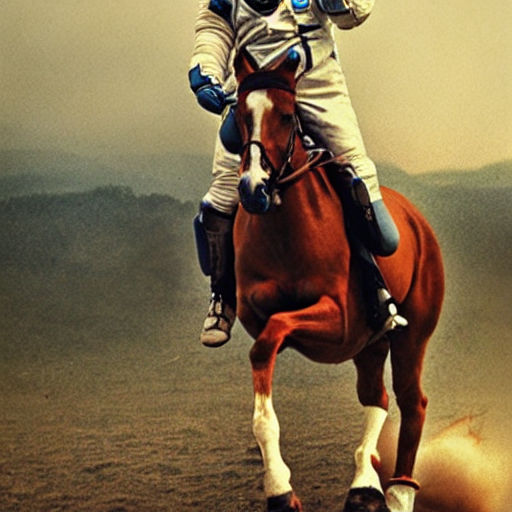

In [4]:
prompt = "a photograph of an astronaut riding a horse"
pipe(prompt).images[0]

In [5]:
import torch
torch.manual_seed(0)

## Generating Text

In [6]:
from transformers import pipeline

classifier = pipeline("text-classification", device=device)
classifier("This movie is disgustingly good !")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998536109924316}]

In [7]:
from transformers import set_seed

# Setting the seed ensures we get the same results every time we run this code
set_seed(10)

In [8]:
generator = pipeline("text-generation")
prompt = "It was a dark and stormy"
generator(prompt)[0]["generated_text"]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

'It was a dark and stormy morning, and my mind went blank.\n\nWalking, I met someone. He looked up at me, like we were in a movie. He didn\'t say a word. He said, "This is your friend. He\'s a member of the group. He\'s not a monster. He\'s not afraid. He doesn\'t have his hands on you, and he doesn\'t have his feet on you, and he doesn\'t have his back to you. He doesn\'t have his voice against you, and he doesn\'t have your thoughts against you."\n\nMy eyes went wide and my eyelids shut. I knew he was there, as was my sister. I saw him with my hands in his. It was a sad moment. I looked up to see what was going on. He was standing on the ground, his head buried in my lap, his face as cold and his eyes as cold and I saw him. He looked confused, as if he never knew what was going to happen. I looked to my left, to my right, to my right.\n\nI didn\'t know what to do. I didn\'t know what to do. I didn\'t know what to do. I didn\'t know what to do. I didn\'t know'

## Generating Sound Clips

In [9]:
pipe = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)
data = pipe("electric rock solo, very intense")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

In [10]:
print(data)

{'audio': array([[[ 0.0016394 ,  0.00083588,  0.02617306, ..., -0.0010694 ,
         -0.00037725, -0.00264145]]], dtype=float32), 'sampling_rate': 32000}


In [ ]:
import IPython.display as ipd

display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))

: 